Steps in building a machine learning model
1.Get the Data

2.Take a Quick Look at the Data

3.Split the Data (Train/Validation/Test)

4.Data Analysis (Exploratory Data Analysis or EDA)

5.Prepare the Data for Machine Learning

6.Select and Train a Model

7.Evaluate the Model

8.Fine-Tune the Model

9.Select a final model

10.Deployment

Step 1-9 would be done in this notebook step 10 would be done in the deployment folder

1.Get the Data
Gather the dataset from relevant sources (e.g., Kaggle, databases, APIs, etc.) check the data folder for more details about the dataset.
Here we would just load the data using pandas. so first we have to import the necessary dependencies

In [151]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize, LabelEncoder
import xgboost as xgb
from imblearn.over_sampling import SMOTE

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/home/dell/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [40]:
df = pd.read_csv('../data/stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


2.Take a Quick Look at the Data
Perform initial exploration of the dataset (e.g., inspect the data types, check for missing values, and view a few records).
This helps to understand what you’re working with.

In [41]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [42]:
hypertension_values = {
    0: "present",
    1: "absent"
}
df.hypertension = df.hypertension.map(hypertension_values)

heart_disease_values = {
    0: "present",
    1: "absent"
}
df.heart_disease = df.heart_disease.map(heart_disease_values)

In [43]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,male,67.0,present,absent,yes,private,urban,228.69,36.6,formerly_smoked,1
1,51676,female,61.0,present,present,yes,self-employed,rural,202.21,NaN,never_smoked,1
2,31112,male,80.0,present,absent,yes,private,rural,105.92,32.5,never_smoked,1
3,60182,female,49.0,present,present,yes,private,urban,171.23,34.4,smokes,1
4,1665,female,79.0,absent,present,yes,self-employed,rural,174.12,24.0,never_smoked,1


In [44]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [45]:
df.describe()

,id,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.893237,0.048728
std,21161.721625,22.612647,45.283560,7.854067,0.215320
min,67.000000,0.080000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,271.740000,97.600000,1.000000


In [46]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   object 
 4   heart_disease      5110 non-null   object 
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 479.2+ KB


In [48]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [49]:
df = df.dropna()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   object 
 4   heart_disease      4909 non-null   object 
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 498.6+ KB


In [54]:
df.duplicated().sum()

0

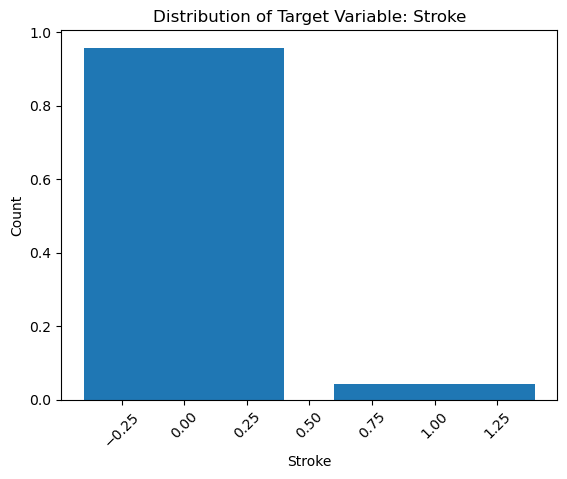

In [55]:
type_counts = df['stroke'].value_counts(normalize=True)

# Bar plot
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Target Variable: Stroke')
plt.xticks(rotation=45) 
plt.show()

from the above quick analysis we know that there are no missing data. We also saw that the target variabe stroke has a class imbalance, which we would also try to solve by using stratified sampling and using class weights when training the model

3.Split the Data (Train/Validation/Test)
Split the data into training, validation, and test sets to evaluate the model’s performance.
A typical split might be 60% training, 20% validation, and 20% testing, though it can vary.

In [59]:
y = df.stroke
X = df.drop(columns=['stroke'])

In [64]:
X_full_train, X_test, y_full_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [65]:
X_full_train = X_full_train.reset_index(drop=True)
y_full_train = y_full_train.reset_index(drop=True)

X_train, X_val, y_train, y_val = train_test_split(
    X_full_train, y_full_train, test_size=0.25, stratify=y_full_train, random_state=42
)

In [66]:
X_full_train.shape, X_train.shape, X_val.shape, X_test.shape

((3927, 11), (2945, 11), (982, 11), (982, 11))

In [67]:
y_full_train.shape, y_train.shape, y_val.shape, y_test.shape

((3927,), (2945,), (982,), (982,))

4.Data Analysis (Exploratory Data Analysis or EDA)
Use statistical and visualization techniques to understand the data better.
This includes checking distributions, correlations, and trends, as well as identifying outliers.

In [71]:
y_full_train.value_counts(normalize=True)

stroke
0    0.957474
1    0.042526
Name: proportion, dtype: float64

In [85]:
corr = df.select_dtypes(exclude="object").corr()

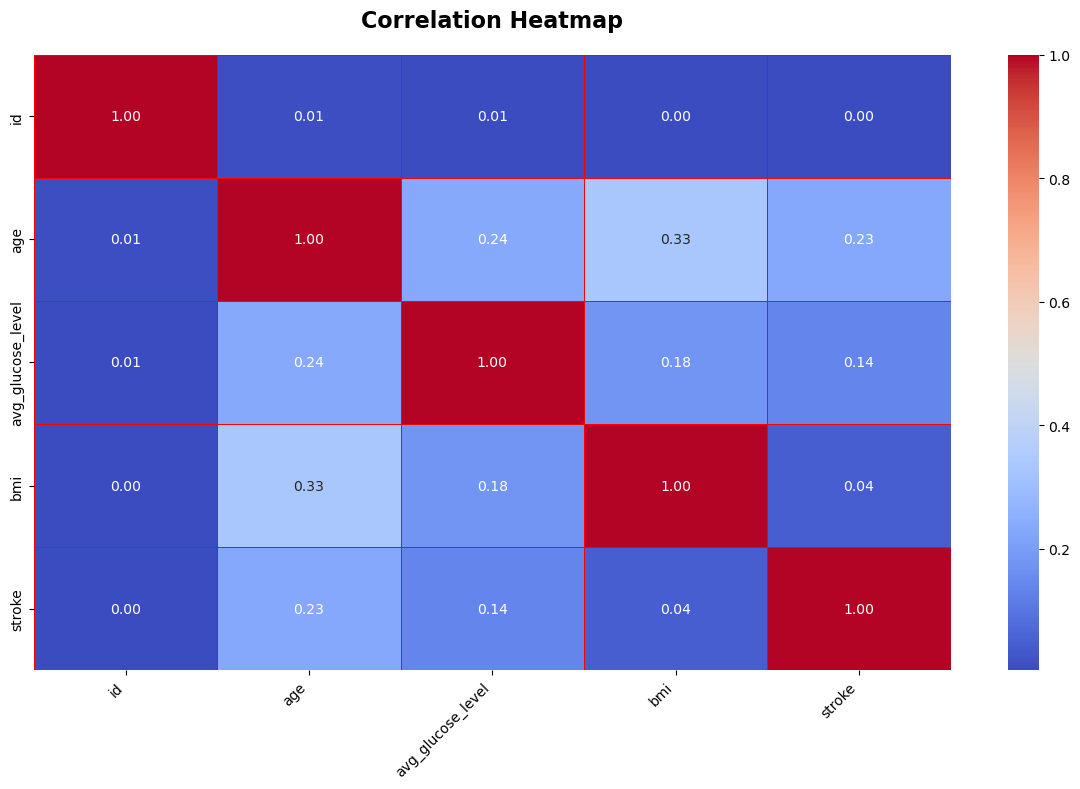

In [86]:
plt.figure(figsize=(12, 8))  
sns.heatmap(
    corr, 
    annot=True,           
    fmt=".2f",            
    cmap="coolwarm",       
    linewidths=0.5,        
    linecolor='red',     
    cbar=True,             
)

plt.title("Correlation Heatmap", fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)  
plt.yticks(fontsize=10)                          
plt.tight_layout()                               
plt.show()

In [99]:
global_stroke = y_full_train.mean()
round(global_stroke, 2)

0.04

In [93]:
X_full_train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [95]:
numerical = ['age', 'avg_glucose_level', 'bmi']

categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
               'work_type', 'residence_type', 'smoking_status']

In [98]:
X_full_train[categorical].nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

In [107]:
def mutual_info_stroke_score(series):
    return mutual_info_score(series, y_full_train)

In [109]:
mi = X_full_train[categorical].apply(mutual_info_stroke_score)
mi.sort_values(ascending=False)

hypertension      0.009299
work_type         0.006137
ever_married      0.005431
heart_disease     0.005043
smoking_status    0.004010
residence_type    0.000034
gender            0.000019
dtype: float64

In [113]:
X_full_train[numerical].corrwith(y_full_train)

age                  0.236926
avg_glucose_level    0.142777
bmi                  0.042861
dtype: float64

5.Prepare the Data for Machine Learning
Clean the data (e.g., handling missing values, scaling, normalization, encoding categorical variables).
Feature engineering may also be needed (e.g., creating new features from existing ones).
I don't think there is nothing much to do here most of the things required have been done in the steps above

6.Select and Train a Model
The models trained are:

LogisticRegression model
RandomForestClassifier
XGBClassifier

In [120]:
dv = DictVectorizer(sparse=False)

In [132]:
train_dicts = X_train[categorical + numerical].to_dict(orient='records')
val_dicts = X_val[categorical + numerical].to_dict(orient='records')

In [133]:
x_train = dv.fit_transform(train_dicts)
x_val = dv.transform(val_dicts)

In [134]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [141]:
# Train a Logistic Regression model for binary classification
logreg = LogisticRegression(max_iter=4000, solver='lbfgs', class_weight='balanced')
logreg.fit(x_train, y_train_encoded)

# Make predictions on the validation set
y_pred_encoded = logreg.predict(x_val)
logreg_probs = logreg.predict_proba(x_val)[:, 1]  # Probability of the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val_encoded, y_pred_encoded))

# Calculate and display ROC AUC for binary classification
auc_score = roc_auc_score(y_val_encoded, logreg_probs)
print(f"Binary ROC AUC Score: {auc_score:.4f}")


Accuracy: 0.7546
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       940
           1       0.13      0.86      0.23        42

    accuracy                           0.75       982
   macro avg       0.56      0.80      0.54       982
weighted avg       0.95      0.75      0.83       982

Binary ROC AUC Score: 0.8455


In [150]:
!pip install imbalanced-learn

In [147]:
# Oversample the minority class
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train_encoded)

# Train a Random Forest model for binary classification
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(x_train_resampled, y_train_resampled)
#rf.fit(x_train, y_train_encoded)

# Make predictions on the validation set
y_pred_encoded = rf.predict(x_val)
rf_probs = rf.predict_proba(x_val)[:, 1]  # Probability of the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val_encoded, y_pred_encoded))

# Calculate and display ROC AUC for binary classification
auc_score = roc_auc_score(y_val_encoded, rf_probs)
print(f"Binary ROC AUC Score: {auc_score:.4f}")

NameError: name 'SMOTE' is not defined

In [138]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/93/66826e2f50cefecbb0a44bd1e667316bf0a3c8e78cd1f0cdf52f5b2c5c6f/xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for nvidia-nccl-cu12 from https://files.pythonhosted.org/packages/ed/1f/6482380ec8dcec4894e7503490fc536d846b0d59694acad9cf99f27d0e7d/nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 941.6 kB/s eta 0:00:00 eta 0:00:010:00:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 74.8 kB/s eta 0:00:00m eta 0:00:010:00:12


In [146]:
# Create an XGBoost model instance for binary classification
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Use binary logistic regression for binary classification
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)

# Fit the model on the training data
xgb_model.fit(x_train, y_train_encoded)

# Make predictions on the validation set
y_pred_encoded = xgb_model.predict(x_val)
xgb_probs = xgb_model.predict_proba(x_val)[:, 1]  # Probability of the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
print(f"Accuracy: {accuracy:.4f}")

# Display detailed classification report
print("Classification Report:")
print(classification_report(y_val_encoded, y_pred_encoded))

# Calculate and display ROC AUC for binary classification
auc_score = roc_auc_score(y_val_encoded, xgb_probs)
print(f"Binary ROC AUC Score: {auc_score:.4f}")

Accuracy: 0.9532
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       940
           1       0.25      0.05      0.08        42

    accuracy                           0.95       982
   macro avg       0.60      0.52      0.53       982
weighted avg       0.93      0.95      0.94       982

Binary ROC AUC Score: 0.8307
